## Hierarchical Clustering: Agglomerative Hierarchical Clustering (AHC)

#### Import Library

In [15]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

#### Load Dataset

In [7]:
data = pd.read_csv("./dataset/Mall_Customers.csv", index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni AnnualIncome dan SpendingScore.

Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

In [10]:
X = data[['AnnualIncome', 'SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan StandardScaler.

In [11]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)
X

array([[-4.31393298e-01, -4.21372977e-01],
       [-4.31393298e-01,  9.16824758e-01],
       [-4.24485019e-01, -1.47281405e+00],
       [-4.24485019e-01,  7.89377354e-01],
       [-4.17576739e-01, -3.89511126e-01],
       [-4.17576739e-01,  7.57515504e-01],
       [-4.10668459e-01, -1.47281405e+00],
       [-4.10668459e-01,  1.33102882e+00],
       [-4.03760179e-01, -1.56839961e+00],
       [-4.03760179e-01,  6.30068100e-01],
       [-4.03760179e-01, -1.21791925e+00],
       [-4.03760179e-01,  1.49033807e+00],
       [-3.96851899e-01, -1.18605740e+00],
       [-3.96851899e-01,  7.89377354e-01],
       [-3.96851899e-01, -1.24978110e+00],
       [-3.96851899e-01,  8.53101056e-01],
       [-3.89943619e-01, -5.48820381e-01],
       [-3.89943619e-01,  4.38896995e-01],
       [-3.76127059e-01, -7.39991486e-01],
       [-3.76127059e-01,  1.45847622e+00],
       [-3.69218779e-01, -5.48820381e-01],
       [-3.69218779e-01,  6.61929951e-01],
       [-3.62310499e-01, -1.50467591e+00],
       [-3.

#### Membentuk Dendogram
Pilih metode complete linkage!

FYI, metode complete linkage bisa diubah dengan:

    single
    average

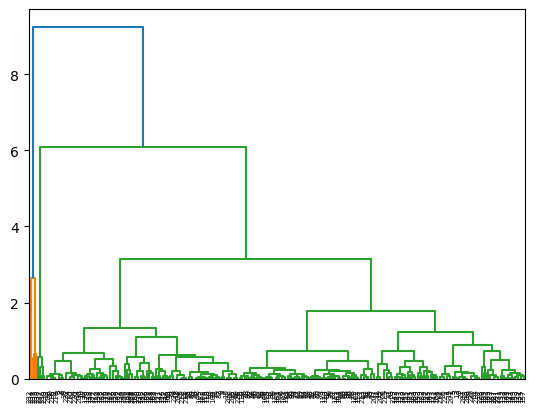

In [16]:
dendrogram = shc.dendrogram(shc.linkage(X, method='complete'))

### Modeling
Kita akan coba membuat model menggunakan algoritma Agglomerative Hierarchical Clustering (AHC) dengan:

    # 4 cluster
    # persamaan jarak menggunakan Euclidean Distance
    # menggunakan metode complete linkage

In [17]:
# Hyperparameter tuning
jumlah_cluster = 4
persamaan_jarak = 'euclidean'
metode_linkage = 'complete'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

#training model
model_AHC.fit(X)

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [18]:
labels_agglo = model_AHC.labels_
labels_agglo

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 0, 0, 0, 2, 2, 2, 2],
      dtype=int64)

### Visualisasi Hasil Clustering

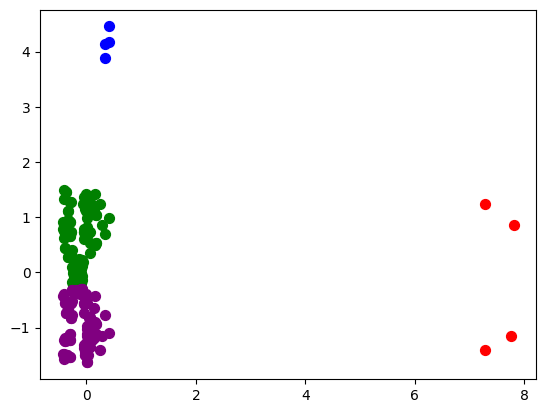

In [20]:
colors = ['red', 'green', 'blue', 'purple', 'magenta', 'orange', 'yellow']

for i in range(jumlah_cluster):
    plt.scatter(X[labels_agglo == i, 0], X[labels_agglo == i, 1], s=50, marker='o', color = colors[i])

Kita bisa lihat hasil clusteringnya sudah bagus, terlihat antar cluster cukup terpisah (tidak ada misalnya anggota cluster warna biru berada di tengah2 warna hijau).

Artinya kita bisa menggunakan hasil clustering ini.

In [21]:
data['Hasil_Clustering'] = labels_agglo 
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,1
3,Female,20,16,6,3
4,Female,23,16,77,1
5,Female,31,17,40,3
...,...,...,...,...,...
209,Female,35,1207,79,0
210,Female,45,126,182,2
211,Male,32,126,174,2


### Kesimpulan
Contoh:

Mencari rata-rata tiap cluster untuk menarik kesimpulan.

In [22]:
for i in range(jumlah_cluster):
    print(f'cluster ke-{i}')
    print('Rata rata pemasukkan customer    :',data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
    print('Rata rata pengeluaran customer   :',data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
    print()

cluster ke-0
Rata rata pemasukkan customer    : 1167.0
Rata rata pengeluaran customer   : 48.5

cluster ke-1
Rata rata pemasukkan customer    : 57.268115942028984
Rata rata pengeluaran customer   : 67.94927536231884

cluster ke-2
Rata rata pemasukkan customer    : 131.5
Rata rata pengeluaran customer   : 182.75

cluster ke-3
Rata rata pemasukkan customer    : 58.40425531914894
Rata rata pengeluaran customer   : 23.74468085106383



Bisa kita simpulkan bahwa :

Cluster 0 adalah kelompok customer sangat kaya dan sangat hemat (pengeluarannya sangat kecil)

Cluster 1 adalah kelompok customer menengah ke bawah dan boros (pengeluaran lebih besar dari pemasukan)

Cluster 3 adalah kelompok customer menengah ke atas dan boros (pengeluaran lebih besar dari pemasukan)

Cluster 1 adalah kelompok customer menengah ke bawah dan hemat (pengeluaran lebih kecil dari pemasukan)